In [1]:
# If not, and you're in Google Colab, go to Runtime -> Change runtime type -> Hardware accelerator -> GPU
!nvidia-smi

Mon May 19 10:54:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

# Plot the validation and training data separately
import matplotlib.pyplot as plt

In [3]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [4]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two TensorFlow model History objects.

    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here)
    """

    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [5]:
import zipfile

def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

# Walk through an image classification directory and find out how many files (images)
# are in each subdirectory.
import os


In [6]:
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


In [7]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

unzip_data("101_food_classes_10_percent.zip")

train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

--2025-05-19 10:59:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G   157MB/s    in 14s     

2025-05-19 10:59:47 (111 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [8]:
walk_through_dir("101_food_classes_10_percent")

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/carrot_cake'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/omelette'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/donuts'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/sashimi'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/pancakes'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/mussels'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/croque_madame'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/gnocchi'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/club_sandwich'.
There are 0 directories and 250 images in '101_food_classes_

In [9]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode="categorical",
                                                                                image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False) # don't shuffle test data for prediction analysis

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [12]:
checkpoint_path = "101_classes_10_percent_data_model_checkpoint.weights.h5" # Added .weights.h5 extension
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True, # save only the model weights
                                                         monitor="val_accuracy", # save the model weights which score the best validation accuracy
                                                         save_best_only=True) # only keep the best model weights on file (delete the rest)

In [13]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## NEW: Newer versions of TensorFlow (2.10+) can use the tensorflow.keras.layers API directly for data augmentation
data_augmentation = Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

In [14]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer") # shape of input image
x = data_augmentation(inputs) # augment images (only happens during training)
x = base_model(x, training=False) # put the base model in inference mode so we can use it to extract features without updating the weights
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x) # pool the outputs of the base model
outputs = layers.Dense(len(train_data_all_10_percent.class_names), activation="softmax", name="output_layer")(x) # same number of outputs as classes
model = tf.keras.Model(inputs, outputs)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
# Get a summary of our model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, None, None,     │     4,049,571 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling          │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 101)            │       129,381 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,178,952 (15.94 MB)

 Trainable params: 129,381 (505.39 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [16]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(), # use Adam with default settings
              metrics=["accuracy"])

# Fit
history_all_classes_10_percent = model.fit(train_data_all_10_percent,
                                           epochs=5, # fit for 5 epochs to keep experiments quick
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data)), # evaluate on smaller portion of test data
                                           callbacks=[checkpoint_callback])

Epoch 1/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 54s 170ms/step - accuracy: 0.1592 - loss: 3.9518 - val_accuracy: 0.3978 - val_loss: 2.5932
Epoch 2/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 75s 153ms/step - accuracy: 0.4715 - loss: 2.3473 - val_accuracy: 0.4677 - val_loss: 2.1456
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 41s 171ms/step - accuracy: 0.5528 - loss: 1.9023 - val_accuracy: 0.4764 - val_loss: 2.0179
Epoch 4/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 41s 173ms/step - accuracy: 0.5913 - loss: 1.6952 - val_accuracy: 0.4966 - val_loss: 1.9031
Epoch 5/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 36s 153ms/step - accuracy: 0.6338 - loss: 1.5191 - val_accuracy: 0.5040 - val_loss: 1.8582


In [17]:
# Evaluate model
results_feature_extraction_model = model.evaluate(test_data)
results_feature_extraction_model

790/790 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.5457 - loss: 1.7164


[1.5845595598220825, 0.5839207768440247]

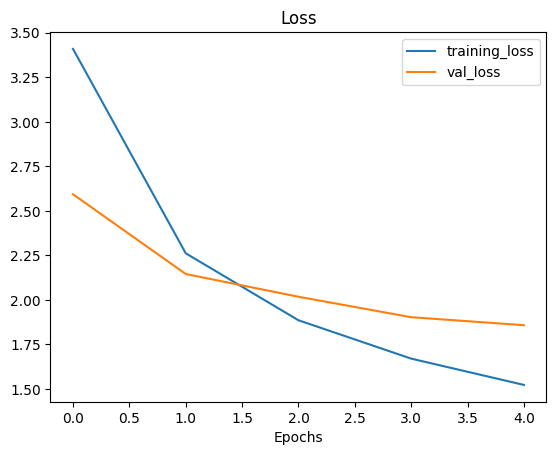

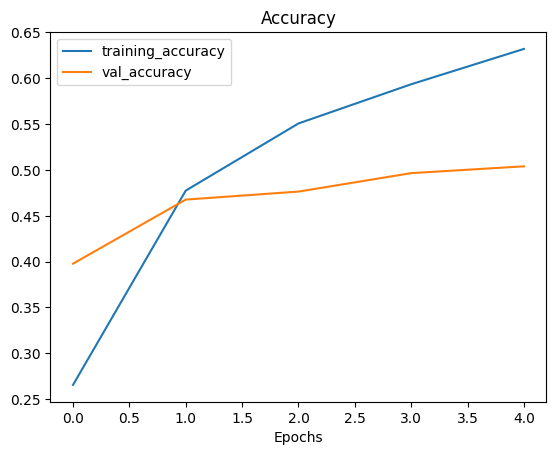

In [18]:
plot_loss_curves(history_all_classes_10_percent)

Fine-tuning

In [54]:
# Step 1: Unfreeze everything
base_model.trainable = True

# Step 2: Freeze all but the last 25
for layer in base_model.layers[:-25]:
    layer.trainable = False

#  Recompile model with lower learning rate
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), # 10x lower learning rate than default
              metrics=['accuracy'])
# 4. Verify
trainable_count = sum([layer.trainable for layer in base_model.layers])
print(f"Trainable layers: {trainable_count}")


Trainable layers: 25


In [55]:
# Fine-tune for 5 more epochs
fine_tune_epochs = 10 # model has already done 5 epochs, this is the total number of epochs we're after (5+5=10)

history_all_classes_10_percent_fine_tune = model.fit(train_data_all_10_percent,
                                                     epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=int(0.15 * len(test_data)), # validate on 15% of the test data
                                                     initial_epoch=history_all_classes_10_percent.epoch[-1]) # start from previous last epoch

Epoch 5/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 56s 173ms/step - accuracy: 0.5376 - loss: 2.0119 - val_accuracy: 0.5564 - val_loss: 1.7459
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 82s 177ms/step - accuracy: 0.6612 - loss: 1.4273 - val_accuracy: 0.5734 - val_loss: 1.6656
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 41s 172ms/step - accuracy: 0.6844 - loss: 1.2700 - val_accuracy: 0.5781 - val_loss: 1.6175
Epoch 8/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 40s 171ms/step - accuracy: 0.7080 - loss: 1.1620 - val_accuracy: 0.5826 - val_loss: 1.6075
Epoch 9/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 37s 153ms/step - accuracy: 0.7209 - loss: 1.0903 - val_accuracy: 0.5890 - val_loss: 1.5699
Epoch 10/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 41s 154ms/step - accuracy: 0.7507 - loss: 1.0017 - val_accuracy: 0.5969 - val_loss: 1.5541


In [56]:
# Evaluate fine-tuned model on the whole test dataset
results_all_classes_10_percent_fine_tune = model.evaluate(test_data)
results_all_classes_10_percent_fine_tune

790/790 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.6069 - loss: 1.4823


[1.370714783668518, 0.629980206489563]

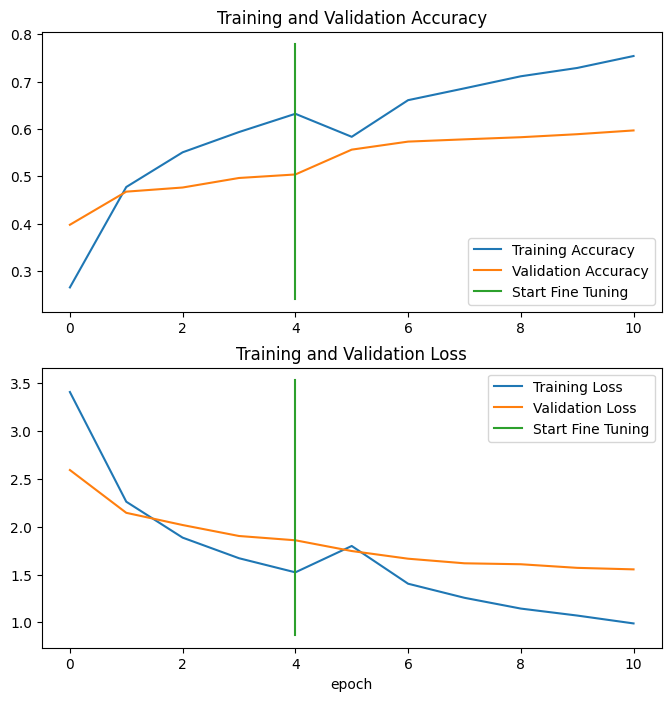

In [57]:
compare_historys(original_history=history_all_classes_10_percent,
                 new_history=history_all_classes_10_percent_fine_tune,
                 initial_epochs=5)

In [62]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os # Import the os module

# Now save the model to your mounted Google Drive
# Assuming you have a directory named 'tensorflow_course' in your Google Drive's root
# Extract the directory path from the full save path
model_save_dir = os.path.dirname('/content/drive/My Drive/tensorflow_course/101_food_class_10_percent_saved_big_dog_model.keras')
model_save_path = '/content/drive/My Drive/tensorflow_course/101_food_class_10_percent_saved_big_dog_model.keras'

# Create the directory if it doesn't exist
if not os.path.exists(model_save_dir):
    os.makedirs(model_save_dir)
    print(f"Created directory: {model_save_dir}")

# Save model to drive
model.save(model_save_path)

print(f"Model saved successfully to {model_save_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Created directory: /content/drive/My Drive/tensorflow_course
Model saved successfully to /content/drive/My Drive/tensorflow_course/101_food_class_10_percent_saved_big_dog_model.keras


In [65]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
saved_model_path = "06_101_food_class_10_percent_saved_big_dog_model.zip"
unzip_data(saved_model_path)
# Note: loading a model will output a lot of 'WARNINGS', these can be ignored: https://www.tensorflow.org/tutorials/keras/save_and_load#save_checkpoints_during_training
# There's also a thread on GitHub trying to fix these warnings: https://github.com/tensorflow/tensorflow/issues/40166
# model = tf.keras.models.load_model("drive/My Drive/tensorflow_course/101_food_class_10_percent_saved_big_dog_model/") # path to drive model


--2025-05-19 11:28:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46760742 (45M) [application/zip]
Saving to: ‘06_101_food_class_10_percent_saved_big_dog_model.zip.2’

06_101_food_class_1 100%[===================>]  44.59M  --.-KB/s    in 0.1s    

2025-05-19 11:28:36 (328 MB/s) - ‘06_101_food_class_10_percent_saved_big_dog_model.zip.2’ saved [46760742/46760742]



In [66]:
# Check to see if loaded model is a trained model
loaded_loss, loaded_accuracy = model.evaluate(test_data)
loaded_loss, loaded_accuracy

790/790 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.6069 - loss: 1.4823


(1.370714783668518, 0.629980206489563)

In [67]:
# Make predictions with model
pred_probs = model.predict(test_data, verbose=1) # set verbosity to see how long it will take

790/790 ━━━━━━━━━━━━━━━━━━━━ 67s 81ms/step


In [68]:
# How many predictions are there?
len(pred_probs)

25250

In [69]:
pred_probs.shape

(25250, 101)

In [70]:
# How do they look?
pred_probs[:10]

array([[1.2925288e-01, 3.4583241e-04, 3.8783129e-02, ..., 1.9741032e-05,
        2.0373318e-02, 6.7958110e-03],
       [8.4050459e-01, 1.3410079e-06, 3.8732772e-03, ..., 2.5056337e-03,
        3.8092110e-06, 5.7440877e-05],
       [5.6588399e-01, 6.4915004e-03, 1.4676815e-02, ..., 4.7903293e-04,
        1.5666537e-03, 5.0550089e-03],
       ...,
       [1.3749994e-01, 6.4143751e-05, 7.5587197e-03, ..., 1.7049864e-01,
        5.3908932e-04, 5.9245620e-04],
       [9.8862238e-02, 2.2454669e-04, 1.0325393e-01, ..., 1.3583545e-04,
        3.2715153e-04, 1.1935426e-04],
       [8.2751048e-01, 2.9078308e-07, 2.5391546e-03, ..., 2.0481774e-03,
        6.5370182e-07, 6.2290567e-04]], dtype=float32)

In [71]:
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 101
What prediction probability sample 0 looks like:
 [1.2925288e-01 3.4583241e-04 3.8783129e-02 4.8547440e-07 1.3071863e-05
 5.0881863e-06 7.9995254e-05 2.3322680e-05 2.1877881e-02 7.7739859e-04
 5.3915314e-06 6.4506807e-05 1.6320985e-03 3.3263907e-06 1.2655085e-03
 4.5107668e-03 6.5681990e-05 1.8507190e-03 1.4657302e-02 9.1288304e-05
 1.9369352e-03 3.9244489e-05 5.0170370e-04 1.3978316e-03 1.9798346e-03
 8.0217514e-03 2.4800161e-03 9.5156305e-05 2.7765844e-02 3.7804747e-03
 1.4319045e-05 7.5764959e-03 2.3646981e-03 5.2787535e-05 2.5257895e-02
 6.4629621e-06 2.2447981e-04 1.3798386e-03 3.3913046e-02 1.0517485e-04
 4.9337564e-04 4.4143973e-03 3.2735491e-04 6.7976420e-05 1.1472536e-04
 5.2341114e-04 3.5680216e-03 1.0221484e-04 1.3557140e-05 5.3043149e-02
 4.0136432e-04 3.1814075e-04 1.2939982e-01 6.3766137e-02 1.1947602e-04
 1.5219584e-02 4.6914937e-03 5.4663112e-03 3.4439698e-02 3.5879177e-05
 2.8265424e-05 4.2412053e-03 4.1444516e-03 2.

Evaluating our models predictions
A very simple evaluation is to use Scikit-Learn's accuracy_score() function which compares truth labels to predicted labels and returns an accuracy score.

If we've created our y_labels and pred_classes arrays correctly, this should return the same accuracy value (or at least very close) as the evaluate() method we used earlier.


[ ]


In [73]:

for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10] # check what they look like (unshuffled)

[np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0)]

In [74]:
len(y_labels)

25250

In [77]:
# Make predictions with model
pred_probs = model.predict(test_data, verbose=1) # set verbosity to see how long it will take

# Convert prediction probabilities to predicted classes
import numpy as np # Import numpy for argmax
pred_classes = np.argmax(pred_probs, axis=1) # Get the class index with the highest probability

# Get accuracy score by comparing predicted classes to ground truth labels
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

790/790 ━━━━━━━━━━━━━━━━━━━━ 62s 78ms/step


0.629980198019802

In [78]:
import numpy as np
print(f"Close? {np.isclose(loaded_accuracy, sklearn_accuracy)} | Difference: {loaded_accuracy - sklearn_accuracy}")

Close? True | Difference: 8.469761003659926e-09


In [80]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [82]:
# Get the class names
class_names = test_data.class_names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [83]:
# Plot a confusion matrix with all 25250 predictions, ground truth labels and 101 classes
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.37      0.22      0.28       250
           1       0.68      0.70      0.69       250
           2       0.68      0.65      0.67       250
           3       0.78      0.63      0.70       250
           4       0.61      0.46      0.53       250
           5       0.51      0.44      0.47       250
           6       0.73      0.79      0.76       250
           7       0.70      0.86      0.77       250
           8       0.29      0.64      0.40       250
           9       0.39      0.75      0.52       250
          10       0.57      0.44      0.50       250
          11       0.77      0.57      0.65       250
          12       0.68      0.64      0.66       250
          13       0.64      0.55      0.59       250
          14       0.56      0.64      0.59       250
          15       0.40      0.38      0.39       250
          16       0.72      0.52      0.61       250
          17       0.44    

In [85]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 0.3684210526315789,
  'recall': 0.224,
  'f1-score': 0.27860696517412936,
  'support': 250.0},
 '1': {'precision': 0.6770428015564203,
  'recall': 0.696,
  'f1-score': 0.6863905325443787,
  'support': 250.0},
 '2': {'precision': 0.6835443037974683,
  'recall': 0.648,
  'f1-score': 0.6652977412731006,
  'support': 250.0},
 '3': {'precision': 0.7783251231527094,
  'recall': 0.632,
  'f1-score': 0.6975717439293598,
  'support': 250.0},
 '4': {'precision': 0.6073298429319371,
  'recall': 0.464,
  'f1-score': 0.5260770975056689,
  'support': 250.0},
 '5': {'precision': 0.5141509433962265,
  'recall': 0.436,
  'f1-score': 0.47186147186147187,
  'support': 250.0},
 '6': {'precision': 0.7306273062730627,
  'recall': 0.792,
  'f1-score': 0.7600767754318618,
  'support': 250.0},
 '7': {'precision': 0.6970684039087948,
  'recall': 0.856,
  'f1-score': 0.7684021543985637,
  'support': 250.0},
 '8': {'precision': 0.28776978417266186,
  'recall': 0.64,
  'f1-score': 0.39702233250

In [87]:
class_f1_scores = {}
# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'apple_pie': 0.27860696517412936,
 'baby_back_ribs': 0.6863905325443787,
 'baklava': 0.6652977412731006,
 'beef_carpaccio': 0.6975717439293598,
 'beef_tartare': 0.5260770975056689,
 'beet_salad': 0.47186147186147187,
 'beignets': 0.7600767754318618,
 'bibimbap': 0.7684021543985637,
 'bread_pudding': 0.3970223325062035,
 'breakfast_burrito': 0.5158620689655172,
 'bruschetta': 0.4954954954954955,
 'caesar_salad': 0.6543778801843319,
 'cannoli': 0.6598360655737705,
 'caprese_salad': 0.5948275862068966,
 'carrot_cake': 0.594392523364486,
 'ceviche': 0.38923395445134573,
 'cheese_plate': 0.605080831408776,
 'cheesecake': 0.4448818897637795,
 'chicken_curry': 0.4951644100580271,
 'chicken_quesadilla': 0.6830265848670757,
 'chicken_wings': 0.7572815533980582,
 'chocolate_cake': 0.5507900677200903,
 'chocolate_mousse': 0.4148148148148148,
 'churros': 0.7505154639175258,
 'clam_chowder': 0.7165991902834008,
 'club_sandwich': 0.7158351409978309,
 'crab_cakes': 0.40481927710843374,
 'creme_brule

In [88]:
# Turn f1-scores into dataframe for visualization
import pandas as pd
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores.head()

class_name  f1-score
33        edamame  0.960938
63       macarons  0.893162
75            pho  0.862205
65        mussels  0.851852
45  frozen_yogurt  0.847656

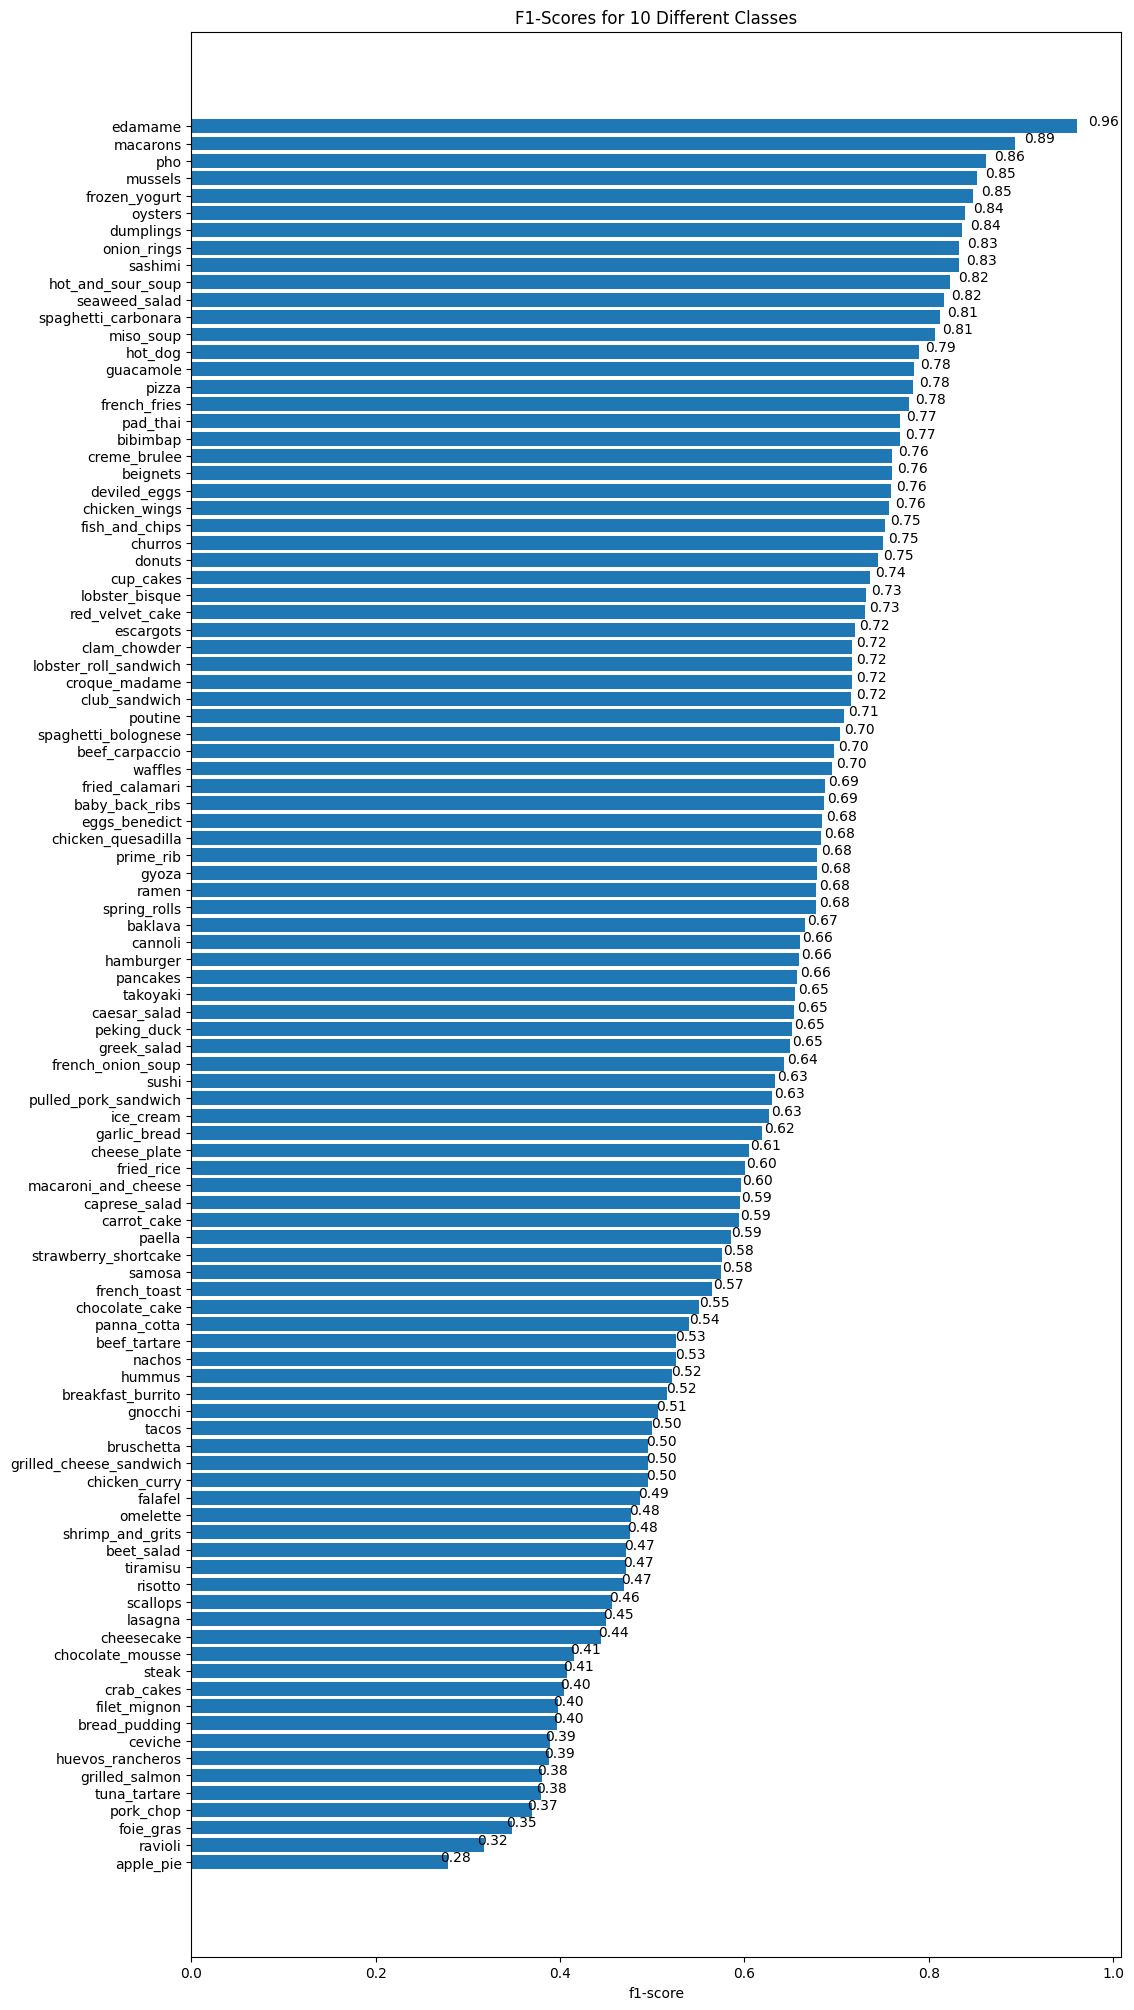

In [90]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects):
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

In [91]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


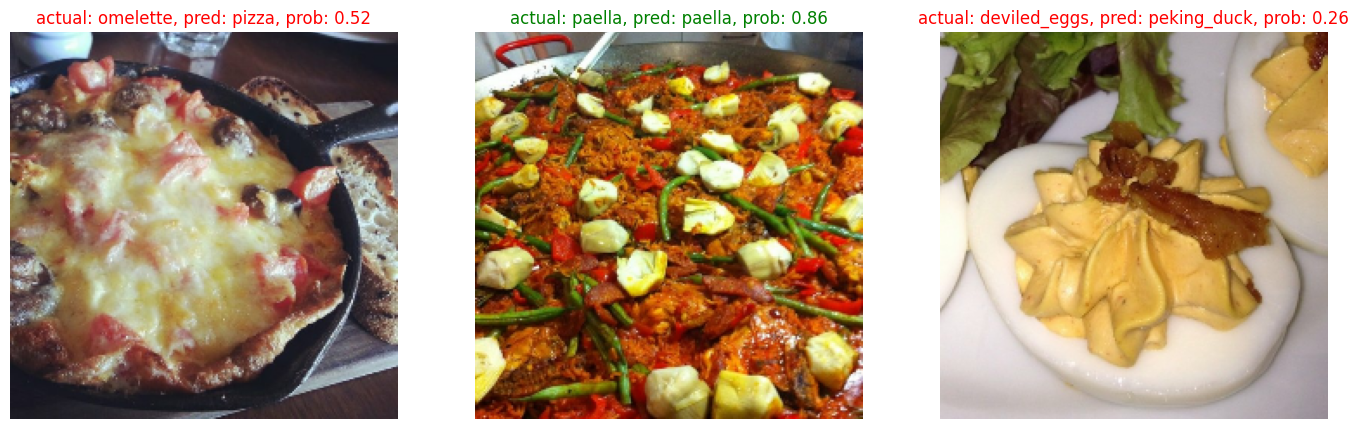

In [92]:
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  # Choose a random image from a random class
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + "/" + class_name))
  filepath = test_dir + class_name + "/" + filename

  # Load the image and make predictions
  img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class

  # Plot the image(s)
  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
    title_color = "g"
  else:
    title_color = "r"
  plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
  plt.axis(False);

In [93]:
filepaths = []
for filepath in test_data.list_files("101_food_classes_10_percent/test/*/*.jpg",
                                     shuffle=False):
  filepaths.append(filepath.numpy())
filepaths[:10]

[b'101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [95]:
import pandas as pd
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": pred_probs.max(axis=1), # get the maximum prediction probability value
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]})
pred_df.head()

img_path  y_true  y_pred  \
0  b'101_food_classes_10_percent/test/apple_pie/1...       0      85   
1  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
2  b'101_food_classes_10_percent/test/apple_pie/1...       0       0   
3  b'101_food_classes_10_percent/test/apple_pie/1...       0       8   
4  b'101_food_classes_10_percent/test/apple_pie/1...       0       8   

   pred_conf y_true_classname y_pred_classname  
0   0.242503        apple_pie           samosa  
1   0.840505        apple_pie        apple_pie  
2   0.565884        apple_pie        apple_pie  
3   0.312343        apple_pie    bread_pudding  
4   0.566297        apple_pie    bread_pudding

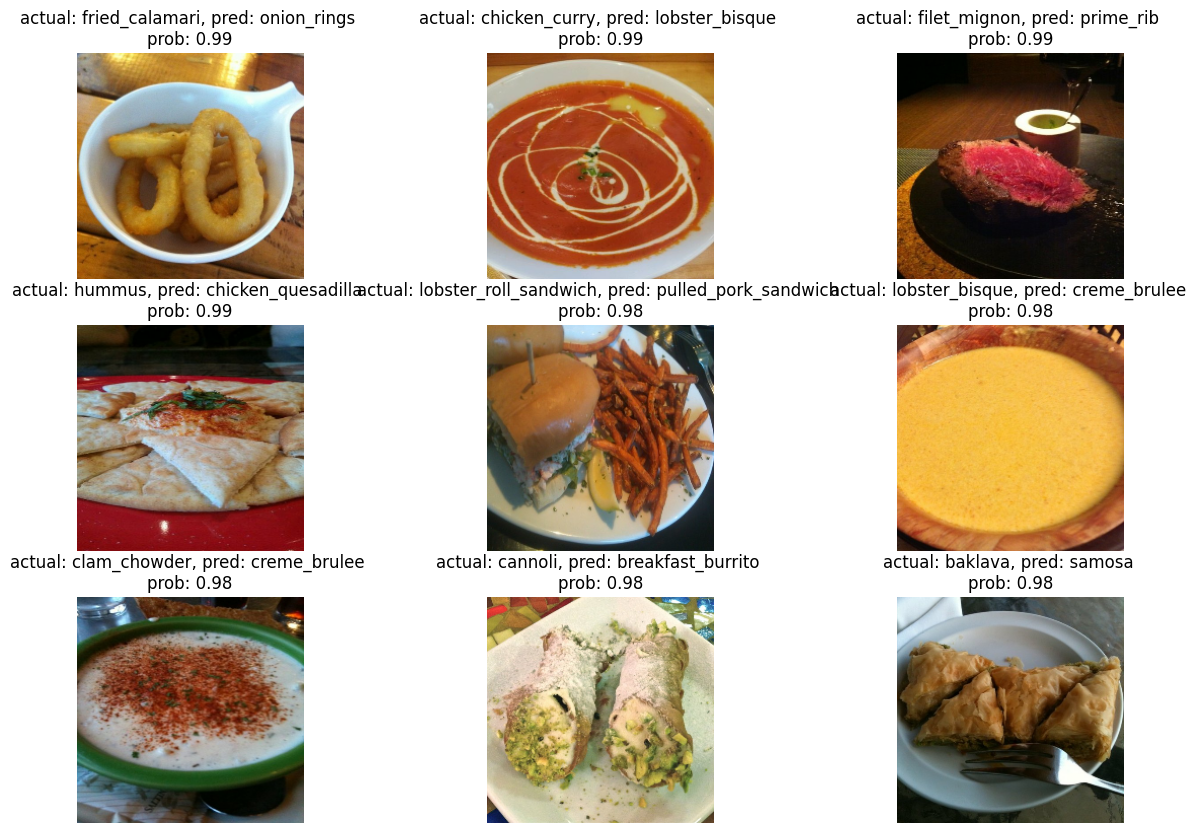

In [98]:
# Filter for incorrect predictions
incorrect_predictions = pred_df[pred_df["y_true"] != pred_df["y_pred"]]

# Sort incorrect predictions by prediction confidence in descending order
top_100_wrong = incorrect_predictions.sort_values("pred_conf", ascending=False)

# Now, the variable top_100_wrong is defined and contains the incorrect predictions
images_to_view = 9
start_index = 10 # change the start index to view more
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3, 3, i+1)
  # Unpack the row tuple, skipping the index (first element) and the classname columns
  index, img_path, y_true_idx, y_pred_idx, pred_conf, y_true_classname, y_pred_classname = row
  img = load_and_prep_image(img_path, scale=True)

  # We are now directly using the values unpacked from the tuple
  plt.imshow(img)
  plt.title(f"actual: {y_true_classname}, pred: {y_pred_classname} \nprob: {pred_conf:.2f}")
  plt.axis(False)